## Template Waveforms

In [1]:
# feel free to change according to your needs

# define session
#data_prefix = "/adata/electro/bt0975/bt0975-23092021-0105/" 
#data_prefix = "/adata/electro/pk1330/pk1330-12112021-0101/"  
#data_prefix = "/adata/electro/pk1330/pk1330-10112021-0101/" 
#data_prefix = "/adata/electro/pk1331/pk1331-23112021-0101_A/" 
#data_prefix = "/adata/electro/pk1331/pk1331-24112021-0101/"

data_prefix = "/adata/electro/pk3864/pk3864-14022022-0109/"

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# load templates
templates = np.load(data_prefix + "templates.npy")
n_clusters, n_timepoints, n_channels = templates.shape
print("Clusters:",n_clusters, "timepoints:",n_timepoints,", Channels:",n_channels)


Clusters: 106 timepoints: 82 , Channels: 64


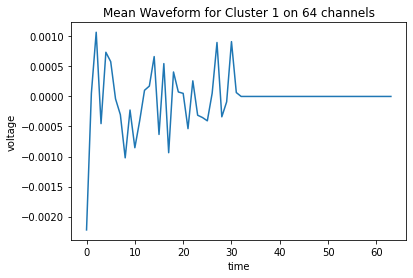

In [3]:
# select a cluster you want to work on
#cluster = 0 # which cluster to analyze
#cluster = 16
cluster = 1

# get the data for that specific cluster (turns 3 dimensions to 2 dimensions by projecting on that component)
template_cluster = templates[cluster]

# plot mean waveform of all channels
mean_waveform = np.mean(template_cluster, axis=0)

plt.plot(mean_waveform)
plt.title("Mean Waveform for Cluster "+str(cluster)+" on "+str(n_channels)+" channels")
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()


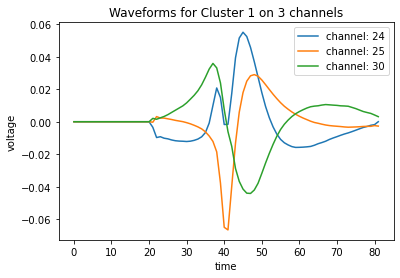

In [4]:
# select some channels
channels = [24,25,30]

for channel in channels:
	plt.plot( template_cluster[:,channel] , label="channel: "+str(channel) )

plt.title("Waveforms for Cluster "+str(cluster)+" on "+str(len(channels))+" channels")
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend()
plt.show()


In [5]:
# ----------------------------------------------------

# get map that puts each spike to its associated template

st = np.load(data_prefix+"spike_templates.npy")

print("There are",len(st),"spikes in total and",len(np.unique(st)),"assignments to templates.")

diffclusters = list(set(range(n_clusters)) - set(np.unique(st)))
print("Clusters not used (",len(diffclusters),"):",diffclusters)

# get index of spikes that were assigned that cluster
spikes_in_cluster = np.where(st==cluster)[0]
print("In that cluster (",cluster,") there are",len(spikes_in_cluster),"spikes.")

# get the corresponding amplitudes
amplitudes = np.load(data_prefix+"amplitudes.npy")
amplitudes_of_spikes_in_cluster = amplitudes[spikes_in_cluster]
mean_amplitude = np.mean(amplitudes_of_spikes_in_cluster)
print("The mean amplitude is",mean_amplitude)


There are 3621996 spikes in total and 106 assignments to templates.
Clusters not used ( 0 ): []
In that cluster ( 1 ) there are 38 spikes.
The mean amplitude is 38.93871307373047


In [6]:
# translate the channels by map

cm = np.load(data_prefix + "channel_map.npy").flatten()

print("channel map:",cm)


channel map: [15  1 14  0 13  9 11 10  2 12  4  8  5  3  6  7 19 29 23 27 28 26 24 25
 30 16 31 17 22 18 21 20 47 33 46 32 45 41 43 42 34 44 36 40 37 35 38 39
 51 61 55 59 60 58 56 57 62 48 63 49 54 50 53 52]


In [7]:
def get_channels_from_cluster(c):
    # get peak to peak amplitude for each channel
    template_cluster = templates[c]
    amps = np.ptp(template_cluster,axis=0)
    channel_amps = np.array([range(n_channels),amps]).T
    channel_amps = np.flip(sorted(channel_amps, key=lambda x: x[1]))
    channels_with_highest_amp = channel_amps[:5,1]
    channels = channels_with_highest_amp.astype(int)
    return(channels)

for c in range(n_clusters):
    channels = get_channels_from_cluster(c)
    channels_mapped = cm[channels]
    print("cluster",c,": channels:",channels,", mapped=",channels_mapped)


cluster 0 : channels: [ 0  1 14 15 16] , mapped= [15  1  6  7 19]
cluster 1 : channels: [ 0  1 10  2 25] , mapped= [15  1  4 14 16]
cluster 2 : channels: [ 1  3  0  8 10] , mapped= [ 1  0 15  2  4]
cluster 3 : channels: [ 1  6  3 19 22] , mapped= [ 1 11  0 27 24]
cluster 4 : channels: [2 0 3 4 5] , mapped= [14 15  0 13  9]
cluster 5 : channels: [2 5 3 4 0] , mapped= [14  9  0 13 15]
cluster 6 : channels: [ 0 20  1  2 16] , mapped= [15 28  1 14 19]
cluster 7 : channels: [ 3  1  0 14 10] , mapped= [ 0  1 15  6  4]
cluster 8 : channels: [ 3 25 26 17 24] , mapped= [ 0 16 31 29 30]
cluster 9 : channels: [4 7 6 5 3] , mapped= [13 10 11  9  0]
cluster 10 : channels: [4 7 6 5 3] , mapped= [13 10 11  9  0]
cluster 11 : channels: [4 2 7 5 6] , mapped= [13 14 10  9 11]
cluster 12 : channels: [5 2 4 7 3] , mapped= [ 9 14 13 10  0]
cluster 13 : channels: [ 6  7  4  5 14] , mapped= [11 10 13  9  6]
cluster 14 : channels: [ 7  6  4  5 14] , mapped= [10 11 13  9  6]
cluster 15 : channels: [ 9  8 11 10

channels for cluster 1 : [ 0  1 10  2 25]


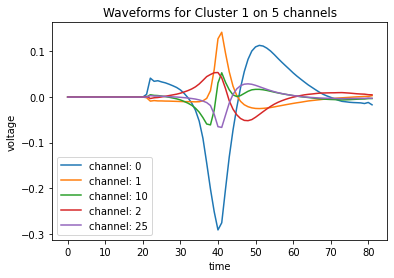

In [8]:
# plot channels with hightest amplitude

channels = get_channels_from_cluster(cluster)
print("channels for cluster",cluster,":",channels)

for channel in channels:
	plt.plot( template_cluster[:,channel] , label="channel: "+str(channel) )

plt.title("Waveforms for Cluster "+str(cluster)+" on "+str(len(channels))+" channels")
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend()
plt.show()


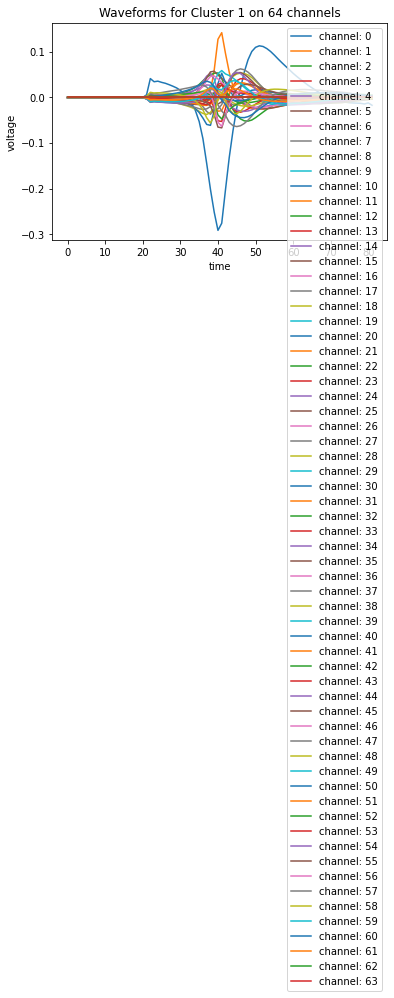

In [9]:
# plot all channels
channels = range(n_channels)

for channel in channels:
	plt.plot( template_cluster[:,channel] , label="channel: "+str(channel) )

plt.title("Waveforms for Cluster "+str(cluster)+" on "+str(len(channels))+" channels")
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend()
plt.show()


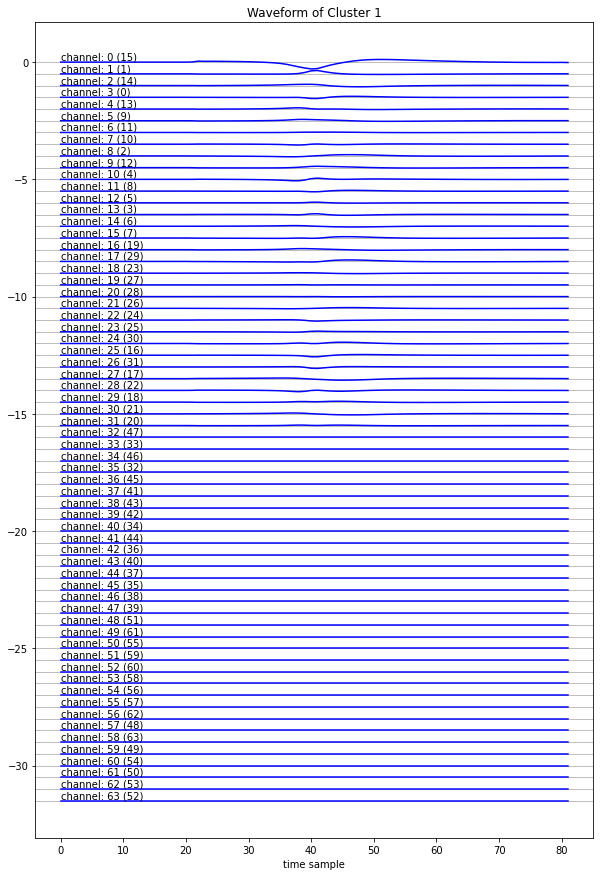

'\n\n## (same using subplots)\n\n# plot all channels\nchannels = range(n_channels)\n\nfig, ax = plt.subplots(nrows=n_channels, sharex=True, figsize=(10,20))\n\nfor i,channel in enumerate(channels):\n    ax[i].plot( template_cluster[:,channel] , label="channel: "+str(channel) , color="blue")\n    ax[i].set_ylabel(i)\nplt.xlabel("time sample")\nplt.yticks([])\nplt.show()\n'

In [10]:
# plot all channels
channels = range(n_channels)

plt.figure(figsize=(10,15))

for i,channel in enumerate(channels):
    plt.axhline( y = -i*.5 , color="grey" , lw=.5 )
    label = "channel: "+str(channel)+" ("+str(cm[channel])+")"
    plt.plot( template_cluster[:,channel] -i*.5 , label=label , color="blue")
    plt.text( s= label , x=0, y=-i*.5 +.1 )
plt.xlabel("time sample")
#plt.legend()
plt.title("Waveform of Cluster "+str(cluster))
plt.show()


'''

## (same using subplots)

# plot all channels
channels = range(n_channels)

fig, ax = plt.subplots(nrows=n_channels, sharex=True, figsize=(10,20))

for i,channel in enumerate(channels):
    ax[i].plot( template_cluster[:,channel] , label="channel: "+str(channel) , color="blue")
    ax[i].set_ylabel(i)
plt.xlabel("time sample")
plt.yticks([])
plt.show()
'''

## Channel position (alignment)

channel: 0  ( 15 ), position: [ 1. 65.] ,  amplitude: 0.40486902
channel: 1  ( 1 ), position: [ 1. 64.] ,  amplitude: 0.16747236
channel: 2  ( 14 ), position: [ 1. 63.] ,  amplitude: 0.10564335
channel: 3  ( 0 ), position: [ 1. 62.] ,  amplitude: 0.09378789
channel: 4  ( 13 ), position: [ 1. 61.] ,  amplitude: 0.07512664
channel: 5  ( 9 ), position: [ 1. 60.] ,  amplitude: 0.082828626
channel: 6  ( 11 ), position: [ 1. 59.] ,  amplitude: 0.020612448
channel: 7  ( 10 ), position: [ 1. 58.] ,  amplitude: 0.047763616
channel: 8  ( 2 ), position: [ 2. 57.] ,  amplitude: 0.09088668
channel: 9  ( 12 ), position: [ 2. 56.] ,  amplitude: 0.075569645
channel: 10  ( 4 ), position: [ 2. 55.] ,  amplitude: 0.11436039
channel: 11  ( 8 ), position: [ 2. 54.] ,  amplitude: 0.06229932
channel: 12  ( 5 ), position: [ 2. 53.] ,  amplitude: 0.039690666
channel: 13  ( 3 ), position: [ 2. 52.] ,  amplitude: 0.06471769
channel: 14  ( 6 ), position: [ 2. 51.] ,  amplitude: 0.05808466
channel: 15  ( 7 ), posi

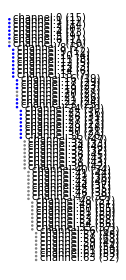

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot

cp = np.load(data_prefix + "channel_positions.npy")

template_cluster = templates[cluster]
amps = np.ptp(template_cluster,axis=0)


for channel, position, amp in zip(range(n_channels), cp, amps):
    print("channel:",channel," (",cm[channel],"), position:",position, ",  amplitude:",amp)
    
    r=0.2
    #r=amp*5.
    #color = 'blue' if channel in channels else 'gray'
    color = 'blue' if amp>.025 else 'gray'
    
    circle = plt.Circle((position[0], position[1]), r, color=color)
    ax.add_patch(circle)
    
    plt.text(x=position[0]+1, y=position[1], s="channel:"+str(channel)+" ("+str(cm[channel])+")")
    

ax.axis('off')
ax.axis('scaled') #this line fits your images to screen 

#ax.autoscale(enable=True) 
plt.tight_layout()
plt.show()




## Spike Templates and Clusters
reference: [phy](https://github.com/kwikteam/phy-contrib/blob/master/docs/template-gui.md#concepts)

In [16]:
# find the difference in templates & clusters after Phy post-processing


import numpy as np

# spike templates
st = np.load(data_prefix + "spike_templates.npy")[:,0]

# spike clusters
sc = np.load(data_prefix + "spike_clusters.npy")



In [25]:
49 in st

True

In [26]:
109 in st

False

In [27]:
49 in sc

False

In [28]:
109 in sc

True

In [ ]:
for s in np.unique(st):
    print("template:",s)
    s_ind = np.where(st==s)
    s_clus = sc[s_ind]
    unique, counts = np.unique(s_clus, return_counts=True)
    print(dict(zip(unique, counts)))
    ###if len(unique)
    print(".\n")

In [32]:
# decompose cluster into templates
def decompose_cluster(c):
    s_ind = np.where(sc==c) # get spikes associated to that cluster $c
    s_templates = st[s_ind] # get templates associated to these spikes
    # now you have: cluster -> spikes -> templates, and thus a mapping from the cluster $c to the templates on which the corresponding spikes were detected
    unique, counts = np.unique(s_templates, return_counts=True) # get the distribution of the templates from the cluster $c
    weights = counts / np.sum(counts) # normalize
    return unique, weights

In [33]:
for c in np.unique(sc):
    print("cluster:",c)
    unique, weights = decompose_cluster(c)
    print(dict(zip(unique, weights)))
    print("")

cluster: 0
{0: 1.0}

cluster: 1
{1: 1.0}

cluster: 2
{2: 1.0}

cluster: 3
{3: 1.0}

cluster: 4
{4: 1.0}

cluster: 5
{5: 1.0}

cluster: 6
{6: 1.0}

cluster: 7
{7: 1.0}

cluster: 8
{8: 1.0}

cluster: 9
{9: 1.0}

cluster: 10
{10: 1.0}

cluster: 11
{11: 1.0}

cluster: 12
{12: 1.0}

cluster: 13
{13: 1.0}

cluster: 14
{14: 1.0}

cluster: 15
{15: 1.0}

cluster: 16
{16: 1.0}

cluster: 17
{17: 1.0}

cluster: 18
{18: 1.0}

cluster: 19
{19: 1.0}

cluster: 20
{20: 1.0}

cluster: 21
{21: 1.0}

cluster: 22
{22: 1.0}

cluster: 23
{23: 1.0}

cluster: 24
{24: 1.0}

cluster: 25
{25: 1.0}

cluster: 26
{26: 1.0}

cluster: 27
{27: 1.0}

cluster: 28
{28: 1.0}

cluster: 29
{29: 1.0}

cluster: 30
{30: 1.0}

cluster: 31
{31: 1.0}

cluster: 32
{32: 1.0}

cluster: 35
{35: 1.0}

cluster: 36
{36: 1.0}

cluster: 37
{37: 1.0}

cluster: 38
{38: 1.0}

cluster: 39
{39: 1.0}

cluster: 40
{40: 1.0}

cluster: 41
{41: 1.0}

cluster: 42
{42: 1.0}

cluster: 43
{43: 1.0}

cluster: 44
{44: 1.0}

cluster: 45
{45: 1.0}

cluster: